## Unsupervised NLP Practice

In [1]:
import numpy as np
import pandas as pd
import scipy

import spacy
import nltk
import re
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Converting sentences to vectors

1. "The best Monty Python sketch is the one about the dead parrot,  I laughed so hard."
2. "I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!"
3. "Chocolate is the best ice cream dessert topping, with a great taste."
4. "The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing."
5. "I would rather put strawberries on my ice cream for dessert, they have the best taste."
6. "The taste of caramel is a fantastic accompaniment to tasty mint ice cream."

In [2]:
sentences = {'s1':"The best Monty Python sketch is the one about the dead parrot,  I laughed so hard.",
             's2':"I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!",
             's3':"Chocolate is the best ice cream dessert topping, with a great taste.",
             's4':"The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing.",
             's5':"I would rather put strawberries on my ice cream for dessert, they have the best taste.",
             's6':"The taste of caramel is a fantastic accompaniment to tasty mint ice cream."}

In [4]:
sentences = pd.DataFrame(list(sentences.items()), columns={'sentence', 'text'})
sentences

,sentence,text
0,s1,The best Monty Python sketch is the one about ...
1,s2,I laugh when I think about Python's Ministry o...
2,s3,Chocolate is the best ice cream dessert toppin...
3,s4,The Lumberjack Song is the funniest Monty Pyth...
4,s5,I would rather put strawberries on my ice crea...
5,s6,The taste of caramel is a fantastic accompanim...


In [16]:
# putting the sentences into an array for easier processing
corpus = np.array(sentences.text)
corpus

array(['The best Monty Python sketch is the one about the dead parrot,  I laughed so hard.',
       "I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!",
       'Chocolate is the best ice cream dessert topping, with a great taste.',
       "The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing.",
       'I would rather put strawberries on my ice cream for dessert, they have the best taste.',
       'The taste of caramel is a fantastic accompaniment to tasty mint ice cream.'],
      dtype=object)

In [17]:
# tokenize with spacy
nlp = spacy.load('en')
tokens = []

for sentence in sentences.text:
    tokens.append(nlp(sentence))

sentences['spacy_tokens'] = tokens
sentences

,sentence,text,spacy_tokens
0,s1,The best Monty Python sketch is the one about ...,"(The, best, Monty, Python, sketch, is, the, on..."
1,s2,I laugh when I think about Python's Ministry o...,"(I, laugh, when, I, think, about, Python, 's, ..."
2,s3,Chocolate is the best ice cream dessert toppin...,"(Chocolate, is, the, best, ice, cream, dessert..."
3,s4,The Lumberjack Song is the funniest Monty Pyth...,"(The, Lumberjack, Song, is, the, funniest, Mon..."
4,s5,I would rather put strawberries on my ice crea...,"(I, would, rather, put, strawberries, on, my, ..."
5,s6,The taste of caramel is a fantastic accompanim...,"(The, taste, of, caramel, is, a, fantastic, ac..."


In [18]:
# source: https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch07_Analyzing_Movie_Reviews_Sentiment/Text%20Normalization%20Demo.ipynb

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [19]:
[lemmatize_text(item) for item in corpus]

['the good monty python sketch be the one about the dead parrot ,   I laugh so hard .',
 "I laugh when I think about python 's ministry of silly walks sketch , it be funny , funny , funny , the good !",
 'chocolate be the good ice cream dessert topping , with a great taste .',
 'the lumberjack song be the funniest monty python bit : I can not think of it without laugh .',
 'I would rather put strawberry on my ice cream for dessert , they have the good taste .',
 'the taste of caramel be a fantastic accompaniment to tasty mint ice cream .']

### Text Pre-Processing

In [20]:
## source: https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lowercase and remove special characters and whitespace
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter out stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [21]:
norm_corpus = normalize_corpus(sentences.text)
norm_corpus

array(['best monty python sketch one dead parrot laughed hard',
       'laugh think pythons ministry silly walks sketch funny funny funny best',
       'chocolate best ice cream dessert topping great taste',
       'lumberjack song funniest monty python bit cant think without laughing',
       'would rather put strawberries ice cream dessert best taste',
       'taste caramel fantastic accompaniment tasty mint ice cream'],
      dtype='<U70')

In [22]:
# lemmatizing corpus
lemma_corpus = [lemmatize_text(str(item)) for item in norm_corpus]
lemma_corpus

['good monty python sketch one dead parrot laugh hard',
 'laugh think python ministry silly walk sketch funny funny funny good',
 'chocolate good ice cream dessert top great taste',
 'lumberjack song funniest monty python bit can not think without laugh',
 'would rather put strawberry ice cream dessert good taste',
 'taste caramel fantastic accompaniment tasty mint ice cream']

In [23]:
# getting word counts
from collections import Counter

all_words = [Counter(item.split(' ')) for item in lemma_corpus]
all_words = pd.DataFrame(all_words).T
all_words.head()

,0,1,2,3,4,5
accompaniment,NaN,NaN,NaN,NaN,NaN,1.0
bit,NaN,NaN,NaN,1.0,NaN,NaN
can,NaN,NaN,NaN,1.0,NaN,NaN
caramel,NaN,NaN,NaN,NaN,NaN,1.0
chocolate,NaN,NaN,1.0,NaN,NaN,NaN


In [24]:
# and maybe a better way to get word counts
all_words['word_count'] = all_words.iloc[:, 1:].sum(axis=1)
all_words.word_count.sort_values(ascending=False).head()

ice      3.0
taste    3.0
good     3.0
cream    3.0
funny    3.0
Name: word_count, dtype: float64

In [25]:
# we're only interested in words occuring more than once
all_words = all_words.loc[all_words.word_count > 1]
all_words

,0,1,2,3,4,5,word_count
cream,NaN,NaN,1.0,NaN,1.0,1.0,3.0
dessert,NaN,NaN,1.0,NaN,1.0,NaN,2.0
funny,NaN,3.0,NaN,NaN,NaN,NaN,3.0
good,1.0,1.0,1.0,NaN,1.0,NaN,3.0
ice,NaN,NaN,1.0,NaN,1.0,1.0,3.0
laugh,1.0,1.0,NaN,1.0,NaN,NaN,2.0
python,1.0,1.0,NaN,1.0,NaN,NaN,2.0
taste,NaN,NaN,1.0,NaN,1.0,1.0,3.0
think,NaN,1.0,NaN,1.0,NaN,NaN,2.0


### TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', min_df=2)
tf_vectors = tfidf.fit_transform(lemma_corpus).toarray()

df = pd.DataFrame(tf_vectors, columns= tfidf.get_feature_names())

df

,cream,dessert,good,ice,laugh,monty,python,sketch,taste,think
0,0.000000,0.000000,0.364066,0.000000,0.424852,0.503219,0.424852,0.503219,0.000000,0.000000
1,0.000000,0.000000,0.364066,0.000000,0.424852,0.000000,0.424852,0.503219,0.000000,0.503219
2,0.441199,0.522581,0.378074,0.441199,0.000000,0.000000,0.000000,0.000000,0.441199,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.456156,0.540298,0.456156,0.000000,0.000000,0.540298
4,0.441199,0.522581,0.378074,0.441199,0.000000,0.000000,0.000000,0.000000,0.441199,0.000000
5,0.577350,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.577350,0.000000


### Document Similarity

In [27]:
# getting document similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tf_vectors)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5
0,1.000000,0.746771,0.137644,0.659485,0.137644,0.000000
1,0.746771,1.000000,0.137644,0.659485,0.137644,0.000000
2,0.137644,0.137644,1.000000,0.000000,1.000000,0.764179
3,0.659485,0.659485,0.000000,1.000000,0.000000,0.000000
4,0.137644,0.137644,1.000000,0.000000,1.000000,0.764179
5,0.000000,0.000000,0.764179,0.000000,0.764179,1.000000


In [28]:
# clustering documents using similarity features
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,4,0,2
1,0,1,0.35812,2
2,5,6,0.522464,3
3,3,7,0.571954,3
4,8,9,3.32874,6


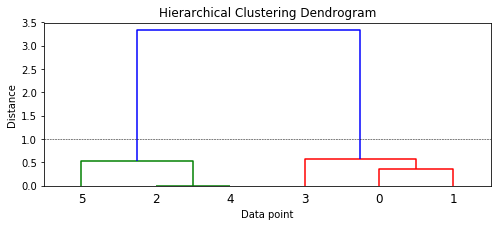

In [29]:
# and visualizing the clusters
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [30]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([sentences, cluster_labels], axis=1)

,sentence,text,spacy_tokens,ClusterLabel
0,s1,The best Monty Python sketch is the one about ...,"(The, best, Monty, Python, sketch, is, the, on...",2
1,s2,I laugh when I think about Python's Ministry o...,"(I, laugh, when, I, think, about, Python, 's, ...",2
2,s3,Chocolate is the best ice cream dessert toppin...,"(Chocolate, is, the, best, ice, cream, dessert...",1
3,s4,The Lumberjack Song is the funniest Monty Pyth...,"(The, Lumberjack, Song, is, the, funniest, Mon...",2
4,s5,I would rather put strawberries on my ice crea...,"(I, would, rather, put, strawberries, on, my, ...",1
5,s6,The taste of caramel is a fantastic accompanim...,"(The, taste, of, caramel, is, a, fantastic, ac...",1


This was pretty accurate!  We have 2 clusters - one about dessert and one about comedy!

### Topic Models with LDA

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]], dtype=int64)

In [32]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2'])
features

/usr/local/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


,T1,T2
0,0.055223,0.944777
1,0.044173,0.955827
2,0.938926,0.061074
3,0.942332,0.057668
4,0.945253,0.054747
5,0.941960,0.058040


In [33]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,accompaniment,best,bit,cant,caramel,chocolate,cream,dead,dessert,fantastic,...,sketch,song,strawberries,taste,tasty,think,topping,walks,without,would
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
5,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [34]:
# show topics and their weights
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('cream', 3.4960093174121845), ('ice', 3.4960093174121845), ('taste', 3.4960093174121845), ('dessert', 2.495949677128065), ('best', 2.4667280002382093), ('put', 1.496314597715346), ('rather', 1.496314597715346), ('strawberries', 1.496314597715346), ('would', 1.496314597715346), ('accompaniment', 1.4962973009527252), ('caramel', 1.4962973009527252), ('fantastic', 1.4962973009527252), ('mint', 1.4962973009527252), ('tasty', 1.4962973009527252), ('chocolate', 1.4958016558414942), ('great', 1.4958016558414942), ('topping', 1.4958016558414942), ('bit', 1.4953506381112385), ('cant', 1.4953506381112385), ('funniest', 1.4953506381112385), ('laughing', 1.4953506381112385), ('lumberjack', 1.4953506381112385), ('song', 1.4953506381112385), ('without', 1.4953506381112385), ('monty', 1.4800469649848658), ('python', 1.4800469649848658), ('think', 1.4762222222095078)]

[('funny', 3.4984909976363134), ('best', 2.533271999761768), ('sketch', 2.498235130332919), ('think', 1.5237777777904717), ('monty',

In [35]:
# clustering using topic model features
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([sentences, cluster_labels], axis=1)

,sentence,text,spacy_tokens,ClusterLabel
0,s1,The best Monty Python sketch is the one about ...,"(The, best, Monty, Python, sketch, is, the, on...",1
1,s2,I laugh when I think about Python's Ministry o...,"(I, laugh, when, I, think, about, Python, 's, ...",1
2,s3,Chocolate is the best ice cream dessert toppin...,"(Chocolate, is, the, best, ice, cream, dessert...",0
3,s4,The Lumberjack Song is the funniest Monty Pyth...,"(The, Lumberjack, Song, is, the, funniest, Mon...",0
4,s5,I would rather put strawberries on my ice crea...,"(I, would, rather, put, strawberries, on, my, ...",0
5,s6,The taste of caramel is a fantastic accompanim...,"(The, taste, of, caramel, is, a, fantastic, ac...",0


These clusters aren't as accurate as the clusters created above with the document similarity features.

## Unsupervised NLP Practice Part II

In [36]:
from nltk.corpus import gutenberg
nltk.download('gutenberg')
import re
from sklearn.model_selection import train_test_split

#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

[nltk_data] Downloading package gutenberg to /Users/tara/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


# TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)

#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]

#List of features
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Train Original sentence:', X_train[5])
print('Train Tf_idf vector:', tfidf_bypara[5])

Number of features: 1948
Train Original sentence: A very few minutes more , however , completed the present trial .
Train Tf_idf vector: {'minutes': 0.7127450310382584, 'present': 0.701423210857947}


In [38]:
X_test_tfidf_csr = X_test_tfidf.tocsr()
n_test = X_test_tfidf_csr.shape[0]
tfidf_bypara = [{} for _ in range(0,n_test)]
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_test_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_test_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Test Original sentence:', X_test[5])
print('Test Tf_idf vector:', tfidf_bypara[5])

Test Original sentence: " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
Test Tf_idf vector: {'resolving': 0.3424390305045805, 'unexceptionable': 0.3196409792117937, 'assure': 0.267729777836069, 'friends': 0.2515333740641343, 'quite': 0.1916471918420347, 'replied': 0.20315405638674577, 'watch': 0.62300800500314, 'elton': 0.16874782424809767, 'pass': 0.28445227585106625, 'really': 0.21963852817625326, 'mrs': 0.14780961753993585}


# Dimension reduction with SVD

In [39]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 45.19168397725449
Component 0:
" Oh !     0.999288
" Oh !     0.999288
" Oh !"    0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !     0.999288
" Oh !     0.999288
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.634219
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.574819
" You are right , Mrs . Weston ," said Mr . Knightley warmly , " Miss Fairfax is as capable as any of us of forming a just opinion of Mrs . Elton .                         0.564536
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I

# Sentence similarity

We can also look at how similar various sentences are to one another.  For example, here are the similarity scores (as a heatmap) of the first 10 sentences in the training set:


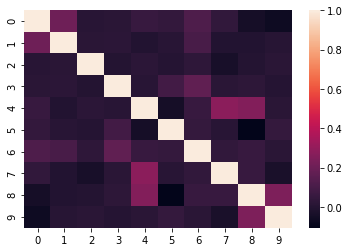

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

In [40]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

Not much similarity at all except between sentences 8 and 9, both of which seem to describe people getting along well.

# Drill 0: Test set

Apply our LSA model to the test set.  

In [41]:
# Remember, you will use the same model, only with the test set data.  Don't fit a new model by mistake!
# Run SVD on the training data, then project the training data.

#Reshapes the vectorizer output into something people can read
X_test_tfidf_csr = X_test_tfidf.tocsr()

#number of paragraphs
n = X_test_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_test_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_test_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'resolving': 0.3424390305045805, 'unexceptionable': 0.3196409792117937, 'assure': 0.267729777836069, 'friends': 0.2515333740641343, 'quite': 0.1916471918420347, 'replied': 0.20315405638674577, 'watch': 0.62300800500314, 'elton': 0.16874782424809767, 'pass': 0.28445227585106625, 'really': 0.21963852817625326, 'mrs': 0.14780961753993585}


In [42]:
# Run SVD on the test data, then project the test data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_test_lsa,index=X_test)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 49.38575958077605
Component 0:
" Oh !     0.999922
" Oh !     0.999922
" Oh !"    0.999922
" Oh !     0.999922
" Oh !     0.999922
" Oh !     0.999922
" Oh !     0.999922
" Oh !     0.999922
" Oh !     0.999922
" Oh !"    0.999922
Name: 0, dtype: float64
Component 1:
" Well , Mrs . Weston ," said Emma triumphantly when he left them , " what do you say now to Mr . Knightley ' s marrying Jane Fairfax ?"                                                                                                                                                                                                                                                                                                             0.617233
After tea , Mr . and Mrs . Weston , and Mr . Elton sat down with Mr . Woodhouse to cards .                                                                                                                                                       

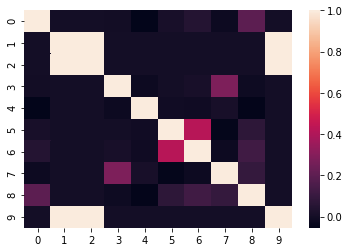

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1 " Oh !
2 " Oh no , no !
3 Such was Jane Fairfax ' s history .
4 " That has been a good deal the case , my dear ; but not to the degree you mention .
5 " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
6 " And here is Mrs . Weston and Mr . Frank Churchill too ! Quite delightful ; so many friends !"
7 " You may well class the delight , the honour , and the comfo

In [43]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_test).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

# Drill 1: Tweaking TF-IDF

Go back up to the code where we originally translated the text from words to numbers.  There are a lot of decision-points here, from the stop list to the thresholds for inclusion and exclusion, and many others as well.  We also didn't integrate spaCy, and so don't have info on lemmas or Named Entities.  Change things up a few times and see how that affects the results of the LSA.  Write up your observations and share them with your mentor.

In [44]:
# using our normalize_corpus function from above
norm_corpus = normalize_corpus(emma_paras)

In [45]:
# lemmatizing corpus
lemma_corpus = [lemmatize_text(str(item)) for item in norm_corpus]

['emma jane austen',
 'volume',
 'chapter',
 'emma woodhouse handsome clever rich comfortable home happy disposition seem unite good blessing existence live nearly twenty one year world little distress vex',
 'young two daughter affectionate indulgent father consequence sister marriage mistress house early period',
 'sixteen year miss taylor mr woodhouse family less governess friend fond daughter particularly emma',
 'real evil indeed emma situation power rather much way disposition think little well disadvantage threaten alloy many enjoyment',
 'sorrow come gentle sorrow shape disagreeable consciousness miss taylor marry',
 'event every promise happiness friend',
 'bear change true friend go half mile emma aware great must difference mrs weston half mile miss taylor house advantage natural domestic great danger suffer intellectual solitude',
 'evil actual disparity age mr woodhouse marry early much increase constitution habit valetudinarian life without activity mind body much old man

In [46]:
X_train, X_test = train_test_split(lemma_corpus, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(lemma_corpus)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)

#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]

#List of features
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Train Original sentence:', X_train[5])
print('Train Tf_idf vector:', tfidf_bypara[5])

Number of features: 1576
Train Original sentence: minute however complete present trial
Train Tf_idf vector: {'minute': 0.5433044653685889, 'present': 0.539466850746499, 'complete': 0.6432695973355234}


In [47]:
X_test_tfidf_csr = X_test_tfidf.tocsr()
n_test = X_test_tfidf_csr.shape[0]
tfidf_bypara = [{} for _ in range(0,n_test)]
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_test_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_test_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Test Original sentence:', X_test[5])
print('Test Tf_idf vector:', tfidf_bypara[5])

Test Original sentence: quite serious assure reply mrs elton gaily resolve always watch employ friend watch also nothing really unexceptionable may pass us
Test Tf_idf vector: {'resolve': 0.29877594245817934, 'unexceptionable': 0.3307899764878611, 'employ': 0.30364217466434607, 'assure': 0.26030679513547617, 'quite': 0.19833179788060232, 'reply': 0.20571464800980616, 'watch': 0.5975518849163587, 'elton': 0.17308886347200939, 'pass': 0.23961410660498242, 'really': 0.2272994650135603, 'mrs': 0.15296517996936204, 'friend': 0.20048039403069223}


In [48]:
#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 49.537532768125324
Component 0:
oh    0.99912
oh    0.99912
oh    0.99912
oh    0.99912
oh    0.99912
oh    0.99912
oh    0.99912
oh    0.99912
oh    0.99912
oh    0.99912
Name: 0, dtype: float64
Component 1:
get upon delicate subject emma say mrs weston smiling remember mr                                 0.628111
make tall emma say mr knightley                                                                   0.588215
emma could say                                                                                    0.586850
misunderstanding emma say expressly                                                               0.586850
know opinion may mrs weston say mr knightley great intimacy emma harriet smith think bad thing    0.581152
right mrs weston say mr knightley warmly miss fairfax capable us form opinion mrs elton           0.552300
mr weston almost much relieved say                                                                0.5450

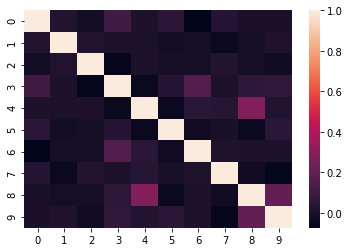

Key:
0 court
1 yes sir indeed much oblige kind solicitude
2 much business engross already plain circumstance forget inquire book recommend
3 restrain much may manner immediately prepare speak exquisite calmness gravity weather night scarcely begin scarcely pass sweep gate join carriage find subject cut hand seize attention demand mr elton actually make violent love avail precious opportunity declare sentiment must already well know hop fear adore ready die refuse flattering ardent attachment unequalled love unexampled passion could fail effect short much resolve seriously accept soon possible
4 emma smile answer visit use nervous part complaint hope even charm away sore throat severe cold indeed
5 minute however complete present trial
6 delight hear speak stoutly subject reply emma smiling mean deny time distant either give reason understand care
7 well intend give one would tell
8 laugh answer good humouredly
9 appear perfectly good understanding among begin rather quickly check add h

In [49]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])